In [3]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

In [4]:
def read_sum_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../lstm/SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "summation_" + str(window_size)
                final_full_path = os.path.join(path, dir, window_dir, "final_topk_summation.txt")    
                dynamic_full_path = os.path.join(path, dir, window_dir, "dynamic_topk_summation.txt")    
                
                with open(final_full_path, 'r') as f:
                    line = f.readline().strip()
                    final_list = [int(num) for num in line.split()]
                    res.append(final_list)
                    
                with open(dynamic_full_path, 'r') as f:
                    line = f.readline().strip()
                    dynamic_list = [int(num) for num in line.split()]
                    res.append(dynamic_list)
            
    return res

# read_sum_data()

In [5]:
def read_total_size_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida20180517_10_caida20180816_0.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../lstm/SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                full_path = os.path.join(path, dir, window_dir,'total_flow_size.txt')    
                with open(full_path, 'r') as f:
                    for val in f:
                        res.append(int(val))
            
    return res

# read_total_size_data()

In [6]:
def read_gt_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../lstm/SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "summation_" + str(window_size)
                gt_full_path = os.path.join(path, dir, window_dir, "gt_topk_summation.txt")    
                
                with open(gt_full_path, 'r') as f:
                    line = f.readline().strip()
                    res = [int(num) for num in line.split()]
                    # res.append(final_list)
            
    return res

# read_gt_data()

## Prepare Dataset

In [24]:
## parameters

name1 = ["zipf2a", "zipf4", "zipf2b"]
name2 = ["caida20180816", "caida20180517", "caida20180621"]

# lens = [["3", "7"],
#         ["4", "6"],
#         ["5", "5"],
#         ["6", "4"],
#         ["7", "3"],
#         ["8", "2"],]

lens = [["8", "2"]]

pcap_file = []
    
# # single dataset
# pcap_file.append("caida20180621_10_caida20180816_0.pcap")

# pcap_file.append("caida20180517_10_caida20180816_0.pcap")
# pcap_file.append("caida20180816_10_caida20180816_0.pcap")
# pcap_file.append("zipf2a_10_caida20180816_0.pcap") 
# pcap_file.append("zipf2b_10_caida20180816_0.pcap") 
# pcap_file.append("zipf4_10_caida20180816_0.pcap")


# # caida + caida
# for l in lens:
#     name = f'{name2[0]}_{l[0]}_{name2[1]}_{l[1]}.pcap'
#     pcap_file.append(name)
    
# for l in lens:
#     name = f'{name2[0]}_{l[0]}_{name2[2]}_{l[1]}.pcap'
#     pcap_file.append(name)
    

# # # caida + zipf
# for n1 in name1:
#     for l in lens:
#         name = f'{name2[0]}_{l[0]}_{n1}_{l[1]}.pcap'
#         pcap_file.append(name)
        
# for n1 in name1:
#     for l in lens:
#         name = f'{name2[1]}_{l[0]}_{n1}_{l[1]}.pcap'
#         pcap_file.append(name)
#         name = f'{name2[2]}_{l[0]}_{n1}_{l[1]}.pcap'
#         pcap_file.append(name)


# # # # zipf + caida
for n1 in name1:
    for n2 in name2[0:2]:
        for l in lens:
            name = f'{n1}_{l[0]}_{n2}_{l[1]}.pcap'
            pcap_file.append(name)

for n1 in name1:
    for l in lens:
        name = f'{n1}_{l[0]}_{name2[2]}_{l[1]}.pcap'
        pcap_file.append(name)

print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['zipf2a_8_caida20180816_2.pcap', 'zipf2a_8_caida20180517_2.pcap', 'zipf4_8_caida20180816_2.pcap', 'zipf4_8_caida20180517_2.pcap', 'zipf2b_8_caida20180816_2.pcap', 'zipf2b_8_caida20180517_2.pcap', 'zipf2a_8_caida20180621_2.pcap', 'zipf4_8_caida20180621_2.pcap', 'zipf2b_8_caida20180621_2.pcap']
Total Pcap File Number: 9


### Plot Both Final & Dynamic TopK

In [8]:
def predict_final_dynamic_topk(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['zipf2a_3_caida20180517_7.pcap'], window_size=200):
    
    res_sum = {}
    res_var = {}
    res_sec_var = {}
    res_sum2 = {}
    res_var2 = {}
    res_sec_var2 = {}
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_var[name] = [None]
            res_var2[name] = [None]
            res_sec_var[name] = [None, None]
            res_sec_var2[name] = [None, None]
            
            res = read_sum_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            
            res_sum[name] = res[0]
            res_sum2[name] = res[1]
            
            for i in range(1, len(res[0])):
                res_var[name].append(res[0][i] - res[0][i-1])
                res_var2[name].append(res[1][i] - res[1][i-1])
                
            for i in range(2, len(res_var[name])):
                res_sec_var[name].append(abs(res_var[name][i] - res_var[name][i-1]))
                res_sec_var2[name].append(abs(res_var2[name][i] - res_var2[name][i-1]))
            
    # res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type, window_size)
    # print(label, len(label))
    # print(res_sum, len(res_sum))
    # print(res_var, len(res_var))
    # print(res_sec_var, len(res_sec_var))
    
    # print(answer)
    ignore = int(1000/window_size)
    pred = []
    pred2 = []
    for i in range(len(label)):
        # final
        end = min(int(10*1000/window_size)+1-ignore, len(res_var[label[i]]))
        # print("+++++++")
        # print(len(res_var[label[i]]))
        # print(end-ignore-1)
        # print("+++++++")
        var_max = max(res_var[label[i]][(1+ignore):end])
        var_avg = sum(res_var[label[i]][(1+ignore):end]) / len(res_var[label[i]][(1+ignore):end])
        var_diff = var_max - var_avg
        # print(var_max, var_avg, var_diff)
        max_idx = ignore+1
        max_val = -1
        for j in range(ignore+1, min(int(10*1000/window_size)+1-ignore, len(res_sec_var[label[i]]))):
            if res_sec_var[label[i]][j] > max_val:
                max_val = res_sec_var[label[i]][j] 
                max_idx = j
                
        pred.append((max_idx-1)*window_size/1000)
        
        # dynamic
        var_max2 = max(res_var2[label[i]][(1+ignore):end])
        var_avg2 = sum(res_var2[label[i]][(1+ignore):end]) / len(res_var2[label[i]][(1+ignore):end])
        var_diff2 = var_max2 - var_avg2
        # print(var_max, var_avg, var_diff)
        max_idx2 = ignore+1
        max_val2 = -1
        for j in range(ignore+1, min(int(10*1000/window_size)+1-ignore, len(res_sec_var2[label[i]]))):
            if res_sec_var2[label[i]][j] > max_val2:
                max_val2 = res_sec_var2[label[i]][j] 
                max_idx2 = j
                
        pred2.append((max_idx2-1)*window_size/1000)
        
        print(i)
        print(label[i])
        print('\tFinal TopK')
        print('\t\t', var_max, var_avg, var_diff)
        print('\t\t', max(res_sec_var[label[i]][(1+ignore):end]), sum(res_sec_var[label[i]][(1+ignore):end]) / len(res_sec_var[label[i]][(1+ignore):end]), max(res_sec_var[label[i]][(1+ignore):end]) - (sum(res_sec_var[label[i]][(1+ignore):end]) / len(res_sec_var[label[i]][(1+ignore):end])))
        print('\t\t', pred[i], answer[i])
        print('\tDynamic TopK')
        print('\t\t', var_max2, var_avg2, var_diff2)
        print('\t\t', max(res_sec_var2[label[i]][(1+ignore):end]), sum(res_sec_var2[label[i]][(1+ignore):end]) / len(res_sec_var2[label[i]][(1+ignore):end]), max(res_sec_var2[label[i]][(1+ignore):end]) - (sum(res_sec_var2[label[i]][(1+ignore):end]) / len(res_sec_var2[label[i]][(1+ignore):end])))
        print('\t\t', pred2[i], answer[i])
        print()
        
    succ = 0
    succ2 = 0
    for i in range(len(pred)):
        if abs(pred[i] - answer[i]) < 1.0:
            succ += 1
            
        if abs(pred2[i] - answer[i]) < 1.0:
            succ2 += 1
    
    print(f'final   topk predict: {succ}/{len(pred)} {succ*100/len(pred)}%')
    print(f'dynamic topk predict: {succ2}/{len(pred2)} {succ2*100/len(pred2)}%')
        
# predict_final_dynamic_topk(width=widths, datasets=pcap_file)

In [9]:
def plot_both_topk(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', window_size=500):
    
    labels = ["Final TopK Sum", "Dynamic TopK Sum", "Final TopK Var", "Dynamic TopK Var", "Final TopK Sec Var", "Dynamic TopK Sec Var"]
    labels = ["Final TopK Sum", "Dynamic TopK Sum", "Final TopK Sec Var", "Dynamic TopK Sec Var"]

    # sum
    res= read_sum_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)
    
    # variation
    fin_res_var = [None]
    dyn_res_var = [None]
    for i in range(1, len(res[0])):
        fin_res_var.append(res[0][i] - res[0][i-1])
        dyn_res_var.append(res[1][i] - res[1][i-1])
        
    # res.append(fin_res_var)
    # res.append(dyn_res_var)
    
    # second variation
    fin_sec_res_var = [None, None]
    dyn_sec_res_var = [None, None]
    for i in range(2, len(res[0])):
        fin_sec_res_var.append(abs(fin_res_var[i] - fin_res_var[i-1]))
        dyn_sec_res_var.append(abs(dyn_res_var[i] - dyn_res_var[i-1]))
        
    res.append(fin_sec_res_var)
    res.append(dyn_sec_res_var)
    
    print(labels, len(labels))
    print(res, len(res))
    print(fin_sec_res_var, len(res))
    print(dyn_sec_res_var, len(res))
    print(f'max: {max(fin_res_var[1:])}, avg: {sum(fin_res_var[1:])/len(fin_res_var[1:])}, diff: {max(fin_res_var[1:]) - (sum(fin_res_var[1:])/len(fin_res_var[1:]))}')
    print(f'max: {max(dyn_res_var[1:])}, avg: {sum(dyn_res_var[1:])/len(dyn_res_var[1:])}, diff: {max(dyn_res_var[1:]) - (sum(dyn_res_var[1:])/len(dyn_res_var[1:]))}')
    
    plt.figure(figsize=(12, 4))
    
    # sns.lineplot(data=res, dashes=False, markers=True, markersize=4)
    # for i, data_set in enumerate(res):
    #     plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        
    # print(dataset)
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i])
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('%s Fixed Window (Window Size = %d)' % (dataset, window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

# datasets = ['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/']
datasets = ["zipf2a_3_caida20180517_7.pcap/"]
# window_sizes = [100, 200, 500]
window_sizes = [200]
# plot_single_both(dataset=pcap_file[4], window_size=200)
# plot_single_both(dataset=datasets[0], window_size=500)

### Total Flow Size Predict

In [10]:
def predict_with_total_size(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['zipf2a_3_caida20180517_7.pcap'], window_size=200):
    
    res_sum = {}
    res_var = {}
    res_sec_var = {}
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_var[name] = [None]
            res_sec_var[name] = [None, None]
            
            res = read_total_size_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            
            res_sum[name] = res
            
            for i in range(1, len(res)):
                res_var[name].append(res[i] - res[i-1])
                
            for i in range(2, len(res_var[name])):
                res_sec_var[name].append(abs(res_var[name][i] - res_var[name][i-1]))
            
    # res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type, window_size)
    # print(label, len(label))
    # print(res_sum, len(res_sum))
    # print(res_var, len(res_var))
    # print(res_sec_var, len(res_sec_var))
    
    # print(answer)
    ignore = int(1000/window_size)
    pred = []
    for i in range(len(label)):
        # final
        print(res_var[label[i]])
        end = min(int(10*1000/window_size)+1-ignore, len(res_var[label[i]]))
        
        var_max = max(res_var[label[i]][1+ignore:end])
        var_avg = sum(res_var[label[i]][1+ignore:end]) / len(res_var[label[i]][1+ignore:end])
        var_diff = var_max - var_avg
        # print(var_max, var_avg, var_diff)
        max_idx = 1+ignore
        max_val = -1
        for j in range(1+ignore, min(int(10*1000/window_size)+1-ignore, len(res_sec_var[label[i]]))):
            if res_sec_var[label[i]][j] > max_val:
                max_val = res_sec_var[label[i]][j] 
                max_idx = j
                
        pred.append((max_idx-1)*window_size/1000)
        
        
        print(i)
        print(label[i])
        print('\tTotal Size')
        print('\t\t', var_max, var_avg, var_diff)
        print('\t\t', max(res_sec_var[label[i]][2:]), sum(res_sec_var[label[i]][2:]) / len(res_sec_var[label[i]][2:]), max(res_sec_var[label[i]][2:]) - (sum(res_sec_var[label[i]][2:]) / len(res_sec_var[label[i]][2:])))
        print('\t\t', pred[i], answer[i])
        print()
        
    succ = 0
    for i in range(len(pred)):
        if abs(pred[i] - answer[i]) < 1.0:
            succ += 1
    
    print(f'total flow size predict: {succ}/{len(pred)} {succ*100/len(pred)}%')
        
# predict_with_total_size(width=widths, datasets=pcap_file)

In [11]:
def plot_single_total_size(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', window_size=500):
    
    # labels = ["Final TopK Sum", "Dynamic TopK Sum", "Final TopK Var", "Dynamic TopK Var", "Final TopK Sec Var", "Dynamic TopK Sec Var"]
    # labels = ["Final TopK Sum", "Dynamic TopK Sum", "Final TopK Sec Var", "Dynamic TopK Sec Var"]
    labels = ["Final TopK Sum", "Final TopK Sec Var",]

    res = []
    # sum
    result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)
    
    # res.append(result)
    
    # variation
    fin_res_var = [None]
    for i in range(1, len(result)):
        fin_res_var.append(result[i] - result[i-1])
        
    # res.append(fin_res_var)
    
    # second variation
    fin_sec_res_var = [None, None]
    for i in range(2, len(result)):
        fin_sec_res_var.append(abs(fin_res_var[i] - fin_res_var[i-1]))
        
    res.append(fin_sec_res_var)
    
    print(labels, len(labels))
    print(res, len(res))
    print(result)
    print(fin_res_var)
    print(fin_sec_res_var, len(res))
    print(f'max: {max(fin_res_var[1:])}, avg: {sum(fin_res_var[1:])/len(fin_res_var[1:])}, diff: {max(fin_res_var[1:]) - (sum(fin_res_var[1:])/len(fin_res_var[1:]))}')
    
    plt.figure(figsize=(12, 4))
    
    # sns.lineplot(data=res, dashes=False, markers=True, markersize=4)
    # for i, data_set in enumerate(res):
    #     plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        
    # print(dataset)
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i])
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('%s Flow Size Variation (Window Size = %d)' % (dataset[:-5], window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

# datasets = ['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/']
datasets = ["zipf2a_3_caida20180517_7.pcap/"]
# window_sizes = [100, 200, 500]
window_sizes = [200]
# plot_single_both(dataset=pcap_file[4], window_size=200)
# plot_single_both(dataset=datasets[0], window_size=500)

['Final TopK Sum', 'Final TopK Sec Var'] 2
[[None, None, 3618, 2791, 6045, 3855, 957, 2559, 2097, 1719, 1245, 3994, 3928, 5376, 99, 4009, 1431, 4587, 50, 940, 964, 521, 213, 3306, 3415, 1753, 538, 1304, 205, 2989, 101, 2668, 1294, 857, 537, 1777, 1148, 381, 511, 243, 7258, 2438, 569, 4548, 2536, 932, 4285, 4482, 1023, 1472, 1574]] 1
[0, 29957, 56296, 85426, 120601, 151921, 182284, 210088, 239989, 268171, 295108, 326039, 353042, 374669, 396197, 421734, 448702, 480257, 511762, 542327, 571928, 602050, 631959, 658562, 688580, 716845, 745648, 773147, 800441, 830724, 860906, 888420, 914640, 940003, 964829, 987878, 1009779, 1031299, 1053330, 1075604, 1105136, 1132230, 1159893, 1192104, 1221779, 1250522, 1274980, 1303920, 1331837, 1358282, 1386301]
[None, 29957, 26339, 29130, 35175, 31320, 30363, 27804, 29901, 28182, 26937, 30931, 27003, 21627, 21528, 25537, 26968, 31555, 31505, 30565, 29601, 30122, 29909, 26603, 30018, 28265, 28803, 27499, 27294, 30283, 30182, 27514, 26220, 25363, 24826, 2304

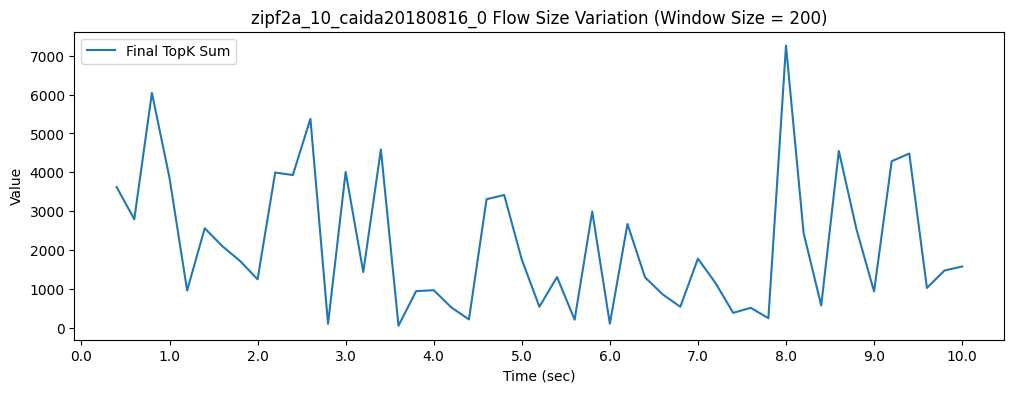

In [12]:
# changing_time_predict_final_topk(width=widths, datasets=pcap_file)
# plot_single_final_topk(dataset=pcap_file[0], type_="accumulate.txt", window_size=200)

# predict_final_dynamic_topk(width=widths, datasets=pcap_file)
# plot_both_topk(dataset=pcap_file[0], window_size=200)

# predict_with_total_size(width=widths, datasets=pcap_file)
plot_single_total_size(dataset=pcap_file[3], window_size=200)

### Predict Final TopK & Dynamic TopK & GT TopK & Total Flow Size

In [13]:
def changes_occured(var, sec_var, pred, n, p):
    var_mean = np.mean(var)
    var_std_dev = np.std(var)
    
    sec_var_mean = np.mean(sec_var)
    sec_var_std_dev = np.std(sec_var)
    
    
    var_q1 = np.percentile(var, 25)
    var_q3 = np.percentile(var, 75)
    var_iqr = p * (var_q3 - var_q1)
    
    sec_var_q1 = np.percentile(sec_var, 25)
    sec_var_q3 = np.percentile(sec_var, 75)
    sec_var_iqr = p * (sec_var_q3 - sec_var_q1)
    
    # n = 3
    
    var_outliers = [val for val in var if abs(val - var_mean) > n * var_std_dev]
    sec_var_outliers = [val for val in sec_var if abs(val - sec_var_mean) > n * sec_var_std_dev]
    
    var_iqr_outliers = [val for val in var if val > var_q3 + var_iqr or val < var_q1 - var_iqr]
    sec_var_iqr_outliers = [val for val in sec_var if val > sec_var_q3 + sec_var_iqr or val < sec_var_q1 - sec_var_iqr]
    
    # print("var outliers")
    # print(var_outliers)
    
    # print("sec var outliers")
    # print(sec_var_outliers)
    
    var_hit = 0
    sec_var_hit = 0
    
    if max(var) in var_outliers:
        var_hit = 1
    if max(sec_var) in sec_var_outliers:
        sec_var_hit = 1
    
    iqr_var_hit = 0
    iqr_sec_var_hit = 0
    
    if max(var) in var_iqr_outliers:
        iqr_var_hit = 1
    if max(sec_var) in sec_var_iqr_outliers:
        iqr_sec_var_hit = 1
    
    return (max(var), var_mean, var_std_dev, var_outliers, var_hit), \
           (max(sec_var), sec_var_mean, sec_var_std_dev, sec_var_outliers, sec_var_hit), \
           (max(var), var_iqr_outliers, iqr_var_hit), \
           (max(sec_var), sec_var_iqr_outliers, iqr_sec_var_hit)
    
    

In [14]:
def predict(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['zipf2a_3_caida20180517_7.pcap'], window_size=200):
    
    # final topk
    res_sum = {}
    res_var = {}
    res_sec_var = {}
    
    # dynamic topk
    res_sum2 = {}
    res_var2 = {}
    res_sec_var2 = {}
    
    # total flow size
    res_sum3 = {}
    res_var3 = {}
    res_sec_var3 = {}
    
    # ground truth
    res_sum4 = {}
    res_var4 = {}
    res_sec_var4 = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_var[name] = [None]
            res_var2[name] = [None]
            res_var3[name] = [None]
            res_var4[name] = [None]
            res_sec_var[name] = [None, None]
            res_sec_var2[name] = [None, None]
            res_sec_var3[name] = [None, None]
            res_sec_var4[name] = [None, None]
            
            res = read_sum_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            res_total = read_total_size_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            res_gt = read_gt_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_sum[name] = res[0]
            res_sum2[name] = res[1]
            res_sum3[name] = res_total
            res_sum4[name] = res_gt
            
            for i in range(1, len(res[0])):
                res_var[name].append(res[0][i] - res[0][i-1])
                res_var2[name].append(res[1][i] - res[1][i-1])
                res_var3[name].append(res_total[i] - res_total[i-1])
                res_var4[name].append(res_gt[i] - res_gt[i-1])
                
            for i in range(2, len(res_var[name])):
                res_sec_var[name].append(abs(res_var[name][i] - res_var[name][i-1]))
                res_sec_var2[name].append(abs(res_var2[name][i] - res_var2[name][i-1]))
                res_sec_var3[name].append(abs(res_var3[name][i] - res_var3[name][i-1]))
                res_sec_var4[name].append(abs(res_var4[name][i] - res_var4[name][i-1]))
            
    # res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type, window_size)
    # print(label, len(label))
    # print(res_sum, len(res_sum))
    # print(res_var, len(res_var))
    # print(res_sec_var, len(res_sec_var))
    
    # print(answer)
    ignore = int(1000/window_size)
    choose = 5
    dev = 3.4 # 99.90%
    # dev = 3.719 # 99.99%
    iqr = 1.5
    
    pred = []
    pred2 = []
    pred3 = []
    pred4 = []
    
    pred_multi = []
    pred2_multi = []
    pred3_multi = []
    pred4_multi = []
    
    norm_hit = 0
    norm_hit2 = 0
    norm_hit3 = 0
    norm_hit4 = 0
    
    iqr_hit = 0
    iqr_hit2 = 0
    iqr_hit3 = 0
    iqr_hit4 = 0
    
    hit = []
    hit2 = []
    hit3 = []
    hit4 = []
    
    
    for i in range(len(label)):
        end = min(int(10*1000/window_size)+1-ignore, len(res_var[label[i]]))
        
        # --- final --- #
        var_max = max(res_var[label[i]][(1+ignore):end])
        var_avg = sum(res_var[label[i]][(1+ignore):end]) / len(res_var[label[i]][(1+ignore):end])
        var_diff = var_max - var_avg
        # print(var_max, var_avg, var_diff)
        max_val = max(res_sec_var[label[i]][(1+ignore):end])
        max_idx = res_sec_var[label[i]].index(max_val)
        
        pred.append((max_idx-1)*window_size/1000)
        
        ### multi
        indexed_val = list(enumerate(res_sec_var[label[i]]))
        sorted_val = sorted(indexed_val[(1+ignore):end], key=lambda x: x[1], reverse=True)
        # print(max_val, max_idx, sorted_val[:choose])
        max_val_list = [x[1] for x in sorted_val[:choose]] 
        max_idx_list = [x[0] for x in sorted_val[:choose]]         
        pred_multi.append([(idx-1)*window_size/1000 for idx in max_idx_list])
        
        
         # --- dynamic --- #
        var_max2 = max(res_var2[label[i]][(1+ignore):end])
        var_avg2 = sum(res_var2[label[i]][(1+ignore):end]) / len(res_var2[label[i]][(1+ignore):end])
        var_diff2 = var_max2 - var_avg2
        # print(var_max, var_avg, var_diff)
        max_val2 = max(res_sec_var2[label[i]][(1+ignore):end])
        max_idx2 = res_sec_var2[label[i]].index(max_val2)
                
        pred2.append((max_idx2-1)*window_size/1000)
        
        ### multi
        indexed_val2 = list(enumerate(res_sec_var2[label[i]]))
        sorted_val2 = sorted(indexed_val2[(1+ignore):end], key=lambda x: x[1], reverse=True)
        max_val_list2 = [x[1] for x in sorted_val2[:choose]] 
        max_idx_list2 = [x[0] for x in sorted_val2[:choose]]         
        pred2_multi.append([(idx-1)*window_size/1000 for idx in max_idx_list2])
        
        
        # --- total flow size --- #
        var_max3 = max(res_var3[label[i]][(1+ignore):end])
        var_avg3 = sum(res_var3[label[i]][(1+ignore):end]) / len(res_var3[label[i]][(1+ignore):end])
        var_diff3 = var_max3 - var_avg3
        # print(var_max, var_avg, var_diff)
        max_val3 = max(res_sec_var3[label[i]][(1+ignore):end])
        max_idx3 = res_sec_var3[label[i]].index(max_val3)
                
        pred3.append((max_idx3-1)*window_size/1000)
        
        ### multi
        indexed_val3 = list(enumerate(res_sec_var3[label[i]]))
        sorted_val3 = sorted(indexed_val3[(1+ignore):end], key=lambda x: x[1], reverse=True)
        max_val_list3 = [x[1] for x in sorted_val3[:choose]] 
        max_idx_list3 = [x[0] for x in sorted_val3[:choose]]         
        pred3_multi.append([(idx-1)*window_size/1000 for idx in max_idx_list3])
        
        
         # --- gt --- #
        var_max4 = max(res_var4[label[i]][(1+ignore):end])
        var_avg4 = sum(res_var4[label[i]][(1+ignore):end]) / len(res_var4[label[i]][(1+ignore):end])
        var_diff4 = var_max4 - var_avg4
        # print(var_max, var_avg, var_diff)
        max_val4 = max(res_sec_var4[label[i]][(1+ignore):end])
        max_idx4 = res_sec_var4[label[i]].index(max_val4)
                
        pred4.append((max_idx4-1)*window_size/1000)
        
        ### multi
        indexed_val4 = list(enumerate(res_sec_var4[label[i]]))
        sorted_val4 = sorted(indexed_val4[(1+ignore):end], key=lambda x: x[1], reverse=True)
        max_val_list4 = [x[1] for x in sorted_val4[:choose]] 
        max_idx_list4 = [x[0] for x in sorted_val4[:choose]]         
        pred4_multi.append([(idx-1)*window_size/1000 for idx in max_idx_list4])
        
        print(i)
        print(label[i])
        print('\tFinal TopK')
        # print('\t\t', var_max, var_avg, var_diff)
        # print('\t\t', max(res_sec_var[label[i]][(1+ignore):end]), sum(res_sec_var[label[i]][(1+ignore):end]) / len(res_sec_var[label[i]][(1+ignore):end]), max(res_sec_var[label[i]][(1+ignore):end]) - (sum(res_sec_var[label[i]][(1+ignore):end]) / len(res_sec_var[label[i]][(1+ignore):end])))
        print('\t\t', res_sec_var[label[i]][(1+ignore):end])
        print('\t\t', changes_occured(res_var[label[i]][(1+ignore):end], res_sec_var[label[i]][(1+ignore):end], answer[i], dev, iqr)[:2])
        print('\t\t', changes_occured(res_var[label[i]][(1+ignore):end], res_sec_var[label[i]][(1+ignore):end], answer[i], dev, iqr)[2:])
        print('\t\t', pred[i], answer[i])
        print('\t\t', pred_multi[i], answer[i])
        print('\tDynamic TopK')
        # print('\t\t', var_max2, var_avg2, var_diff2)
        # print('\t\t', max(res_sec_var2[label[i]][(1+ignore):end]), sum(res_sec_var2[label[i]][(1+ignore):end]) / len(res_sec_var2[label[i]][(1+ignore):end]), max(res_sec_var2[label[i]][(1+ignore):end]) - (sum(res_sec_var2[label[i]][(1+ignore):end]) / len(res_sec_var2[label[i]][(1+ignore):end])))
        print('\t\t', res_sec_var2[label[i]][(1+ignore):end])
        print('\t\t', changes_occured(res_var2[label[i]][(1+ignore):end], res_sec_var2[label[i]][(1+ignore):end], answer[i], dev, iqr)[:2])
        print('\t\t', changes_occured(res_var2[label[i]][(1+ignore):end], res_sec_var2[label[i]][(1+ignore):end], answer[i], dev, iqr)[2:])
        print('\t\t', pred2[i], answer[i])
        print('\t\t', pred2_multi[i], answer[i])
        print('\tGT TopK')
        # print('\t\t', var_max4, var_avg4, var_diff4)
        # print('\t\t', max(res_sec_var4[label[i]][(1+ignore):end]), sum(res_sec_var4[label[i]][(1+ignore):end]) / len(res_sec_var4[label[i]][(1+ignore):end]), max(res_sec_var4[label[i]][(1+ignore):end]) - (sum(res_sec_var4[label[i]][(1+ignore):end]) / len(res_sec_var4[label[i]][(1+ignore):end])))
        print('\t\t', res_sec_var4[label[i]][(1+ignore):end])
        print('\t\t', changes_occured(res_var4[label[i]][(1+ignore):end], res_sec_var4[label[i]][(1+ignore):end], answer[i], dev, iqr)[:2])
        print('\t\t', changes_occured(res_var4[label[i]][(1+ignore):end], res_sec_var4[label[i]][(1+ignore):end], answer[i], dev, iqr)[2:])
        print('\t\t', pred4[i], answer[i])
        print('\t\t', pred4_multi[i], answer[i])
        print('\tTotal Flow ')
        # print('\t\t', var_max3, var_avg3, var_diff3)
        # print('\t\t', max(res_sec_var3[label[i]][(1+ignore):end]), sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end]), max(res_sec_var3[label[i]][(1+ignore):end]) - (sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end])))
        print('\t\t', res_sec_var3[label[i]][(1+ignore):end])
        print('\t\t', changes_occured(res_var3[label[i]][(1+ignore):end], res_sec_var3[label[i]][(1+ignore):end], answer[i], dev, iqr)[:2])
        print('\t\t', changes_occured(res_var3[label[i]][(1+ignore):end], res_sec_var3[label[i]][(1+ignore):end], answer[i], dev, iqr)[2:])
        print('\t\t', pred3[i], answer[i])
        print('\t\t', pred3_multi[i], answer[i])
        print()
        
        if changes_occured(res_var[label[i]][(1+ignore):end], res_sec_var[label[i]][(1+ignore):end], answer[i], dev, iqr)[1][4]:
            if answer[i] == 10:
                hit.append(0)
            else:
                norm_hit += 1
                hit.append(1)
        else:
            if answer[i] == 10:
                norm_hit += 1
                hit.append(1)
            else:
                hit.append(0)
            
        if changes_occured(res_var2[label[i]][(1+ignore):end], res_sec_var2[label[i]][(1+ignore):end], answer[i], dev, iqr)[1][4]:
            if answer[i] == 10:
                hit2.append(0)
            else:
                norm_hit2 += 1
                hit2.append(1)
        else:
            if answer[i] == 10:
                norm_hit2 += 1
                hit2.append(1)
            else:
                hit2.append(0)
            
        if changes_occured(res_var3[label[i]][(1+ignore):end], res_sec_var3[label[i]][(1+ignore):end], answer[i], dev, iqr)[1][4]:
            if answer[i] == 10:
                hit3.append(0)
            else:
                norm_hit3 += 1
                hit3.append(1)
        else:
            if answer[i] == 10:
                norm_hit3 += 1
                hit3.append(1)
            else:
                hit3.append(0)
            
        if changes_occured(res_var4[label[i]][(1+ignore):end], res_sec_var4[label[i]][(1+ignore):end], answer[i], dev, iqr)[1][4]:
            if answer[i] == 10:
                hit4.append(0)
            else:
                norm_hit4 += 1
                hit4.append(1)
        else:
            if answer[i] == 10:
                norm_hit4 += 1
                hit4.append(1)
            else:
                hit4.append(0)
            
            
        if changes_occured(res_var[label[i]][(1+ignore):end], res_sec_var[label[i]][(1+ignore):end], answer[i], dev, iqr)[3][2]:
            if answer[i] != 10:
                iqr_hit += 1
        else:
            if answer[i] == 10:
                iqr_hit += 1
        if changes_occured(res_var2[label[i]][(1+ignore):end], res_sec_var2[label[i]][(1+ignore):end], answer[i], dev, iqr)[3][2]:
            if answer[i] != 10:
                iqr_hit2 += 1
        else:
            if answer[i] == 10:
                iqr_hit2 += 1
        if changes_occured(res_var3[label[i]][(1+ignore):end], res_sec_var3[label[i]][(1+ignore):end], answer[i], dev, iqr)[3][2]:
            if answer[i] != 10:
                iqr_hit3 += 1
        else:
            if answer[i] == 10:
                iqr_hit3 += 1
        if changes_occured(res_var4[label[i]][(1+ignore):end], res_sec_var4[label[i]][(1+ignore):end], answer[i], dev, iqr)[3][2]:
            if answer[i] != 10:
                iqr_hit4 += 1
        else:
            if answer[i] == 10:
                iqr_hit4 += 1
            
    print("changing predict norm")
    print(f'final   topk predict: {norm_hit}/{len(pred)} {norm_hit*100/len(pred)}%')
    print(f'dynamic topk predict: {norm_hit2}/{len(pred2)} {norm_hit2*100/len(pred2)}%')
    print(f'  gt    topk predict: {norm_hit4}/{len(pred4)} {norm_hit4*100/len(pred4)}%')
    print(f' total flow  predict: {norm_hit3}/{len(pred3)} {norm_hit3*100/len(pred3)}%')
    print()
    
    print("changing predict iqr")
    print(f'final   topk predict: {iqr_hit}/{len(pred)} {iqr_hit*100/len(pred)}%')
    print(f'dynamic topk predict: {iqr_hit2}/{len(pred2)} {iqr_hit2*100/len(pred2)}%')
    print(f'  gt    topk predict: {iqr_hit4}/{len(pred4)} {iqr_hit4*100/len(pred4)}%')
    print(f' total flow  predict: {iqr_hit3}/{len(pred3)} {iqr_hit3*100/len(pred3)}%')
    print()
        
    succ = 0
    succ2 = 0
    succ3 = 0
    succ4 = 0

    for i in range(len(pred)):
        if abs(pred[i] - answer[i]) <= 1.0:
            succ += 1
            
        if abs(pred2[i] - answer[i]) <= 1.0:
            succ2 += 1
            
        if abs(pred3[i] - answer[i]) <= 1.0:
            succ3 += 1
            
        if abs(pred4[i] - answer[i]) <= 1.0:
            succ4 += 1
    
    print("single predict")
    print(f'final   topk predict: {succ}/{len(pred)} {succ*100/len(pred)}%')
    print(f'dynamic topk predict: {succ2}/{len(pred2)} {succ2*100/len(pred2)}%')
    print(f'  gt    topk predict: {succ4}/{len(pred4)} {succ4*100/len(pred4)}%')
    print(f' total flow  predict: {succ3}/{len(pred3)} {succ3*100/len(pred3)}%')
    print()
    
    succ = 0
    succ2 = 0
    succ3 = 0
    succ4 = 0

    for i in range(len(pred)):
        if answer[i] == 10:
            if hit[i] == 1:
                succ += 1
            if hit2[i] == 1:
                succ2 += 1
            if hit3[i] == 1:
                succ3 += 1
            if hit4[i] == 1:
                succ4 += 1
        else:    
            if abs(pred[i] - answer[i]) <= 1.0 and hit[i] == 1:
                succ += 1
                
            if abs(pred2[i] - answer[i]) <= 1.0 and hit2[i] == 1:
                succ2 += 1
                
            if abs(pred3[i] - answer[i]) <= 1.0 and hit3[i] == 1:
                succ3 += 1
                
            if abs(pred4[i] - answer[i]) <= 1.0 and hit4[i] == 1:
                succ4 += 1
    
    print("single comprehensive predict")
    print(f'final   topk predict: {succ}/{len(pred)} {succ*100/len(pred)}%')
    print(f'dynamic topk predict: {succ2}/{len(pred2)} {succ2*100/len(pred2)}%')
    print(f'  gt    topk predict: {succ4}/{len(pred4)} {succ4*100/len(pred4)}%')
    print(f' total flow  predict: {succ3}/{len(pred3)} {succ3*100/len(pred3)}%')
    print()
    
    succ = 0
    succ2 = 0
    succ3 = 0
    succ4 = 0

    for i in range(len(pred)):
        for pred in pred_multi[i]:
            # if abs(pred - answer[i]) == 0:
            if abs(pred - answer[i]) <= 1.0:
                succ += 1
                break
                
        for pred in pred2_multi[i]:
            # if abs(pred - answer[i]) == 0:
            if abs(pred - answer[i]) <= 1.0:
                succ2 += 1
                break
                
        for pred in pred3_multi[i]:
            # if abs(pred - answer[i]) == 0:
            if abs(pred - answer[i]) <= 1.0:
                succ3 += 1
                break
            
        for pred in pred4_multi[i]:
            # if abs(pred - answer[i]) == 0:
            if abs(pred - answer[i]) <= 1.0:
                succ4 += 1
                break
    
    print("multi predict")
    print(f'final   topk predict: {succ}/{len(pred_multi)} {succ*100/len(pred_multi)}%')
    print(f'dynamic topk predict: {succ2}/{len(pred2_multi)} {succ2*100/len(pred2_multi)}%')
    print(f'  gt    topk predict: {succ4}/{len(pred4_multi)} {succ4*100/len(pred4_multi)}%')
    print(f' total flow  predict: {succ3}/{len(pred3_multi)} {succ3*100/len(pred3_multi)}%')
    print()
    
    
    
    
        
# predict_final_dynamic_topk(width=widths, datasets=pcap_file)

In [25]:
predict(width=widths, datasets=pcap_file, window_size=200)

0
zipf2a_8_caida20180816_2_4096
	Final TopK
		 [895, 1066, 541, 187, 2290, 3207, 1956, 1453, 246, 3206, 153, 739, 247, 1442, 587, 1640, 1301, 642, 345, 223, 11, 382, 816, 1994, 442, 1964, 119, 421, 836, 1336, 143, 534, 279, 623, 226, 2199, 828, 1083, 1054, 166]
		 ((7015, 4111.475, 1586.3038641366918, [], 0), (3207, 945.55, 813.880579384961, [], 0))
		 ((7015, [], 0), (3207, [3207, 3206], 1))
		 2.0 8
		 [2.0, 2.8, 1.8, 8.0, 5.6] 8
	Dynamic TopK
		 [1553, 1203, 1205, 353, 1433, 3051, 2246, 1511, 81, 3183, 795, 86, 247, 1353, 430, 1059, 966, 642, 345, 223, 11, 382, 891, 2220, 1119, 1588, 119, 297, 916, 1868, 185, 534, 279, 623, 226, 2199, 828, 1083, 1054, 166]
		 ((7210, 4062.75, 1536.3775699677471, [], 0), (3183, 963.825, 793.7038455085121, [], 0))
		 ((7210, [], 0), (3183, [3051, 3183], 1))
		 2.8 8
		 [2.8, 2.0, 2.2, 5.6, 8.0] 8
	GT TopK
		 [1553, 1212, 1208, 341, 1439, 3049, 2245, 1516, 78, 3186, 809, 80, 253, 1338, 445, 1043, 953, 649, 350, 217, 27, 369, 910, 2202, 1135, 1575, 132,